In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

data = pd.read_csv(r'C:\Users\Kerry\membership_groceries_userprofile.csv')
print(data.shape)
data.head()

(858, 15)


,id,gender,shared_account,membership_tier,membership_auto_renew,membership_fee,membership_start_date,push_notification_enabled,have_app,app_engagement_score,bought_store_brand,promotion_participation_count,average_basket_size,use_count,reward_points_used
0,1,Male,0,standard,1,188,2023/6/25,1,1,84.64,0,2,385.77,14,107
1,2,Female,0,standard,0,188,2019/4/14,1,1,83.78,1,3,126.74,14,149
2,3,Female,0,standard,0,188,2021/10/4,0,0,0.00,0,5,668.71,7,87
3,4,Male,0,standard,1,188,2023/11/22,0,1,51.31,1,2,194.62,12,67
4,5,Female,1,premium,1,388,2019/10/8,1,1,70.82,0,1,519.91,7,120


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             858 non-null    int64  
 1   gender                         858 non-null    object 
 2   shared_account                 858 non-null    int64  
 3   membership_tier                858 non-null    object 
 4   membership_auto_renew          858 non-null    int64  
 5   membership_fee                 858 non-null    int64  
 6   membership_start_date          858 non-null    object 
 7   push_notification_enabled      858 non-null    int64  
 8   have_app                       858 non-null    int64  
 9   app_engagement_score           858 non-null    float64
 10  bought_store_brand             858 non-null    int64  
 11  promotion_participation_count  858 non-null    int64  
 12  average_basket_size            858 non-null    flo

In [5]:
data.isnull().sum()

id                               0
gender                           0
shared_account                   0
membership_tier                  0
membership_auto_renew            0
membership_fee                   0
membership_start_date            0
push_notification_enabled        0
have_app                         0
app_engagement_score             0
bought_store_brand               0
promotion_participation_count    0
average_basket_size              0
use_count                        0
reward_points_used               0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,id,shared_account,membership_auto_renew,membership_fee,push_notification_enabled,have_app,app_engagement_score,bought_store_brand,promotion_participation_count,average_basket_size,use_count,reward_points_used
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,429.500000,0.224942,0.780886,270.284382,0.517483,0.748252,51.830897,0.493007,2.969697,436.723508,11.301865,92.835664
std,247.827561,0.417787,0.413887,98.475679,0.499986,0.434271,32.556343,0.500243,1.942947,283.632009,2.590895,46.959699
min,1.000000,0.000000,0.000000,188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,4.000000,0.000000
25%,215.250000,0.000000,1.000000,188.000000,0.000000,0.000000,0.000000,0.000000,2.000000,258.162500,10.000000,59.000000
50%,429.500000,0.000000,1.000000,188.000000,1.000000,1.000000,62.965000,0.000000,3.000000,355.235000,11.000000,95.000000
75%,643.750000,0.000000,1.000000,388.000000,1.000000,1.000000,75.892500,1.000000,4.000000,534.317500,13.000000,126.750000
max,858.000000,1.000000,1.000000,388.000000,1.000000,1.000000,95.000000,1.000000,9.000000,1500.000000,18.000000,200.000000


### Support Vector Machine

In [10]:
df_encoded = data.copy()
label_encoders = {}

# Encode the target variable
le_target = LabelEncoder()
df_encoded['membership_tier'] = le_target.fit_transform(df_encoded['membership_tier'])

# Encode categorical features
categorical_cols = ['gender', 'shared_account', 'promotion_participation_count', 'membership_fee', 'have_app', 'reward_points_used']
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Features and target
X = df_encoded.drop(columns=['id', 'membership_start_date'])
y = df_encoded['membership_tier']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,  test_size=0.2, random_state=42)

# Grid search for best SVM polynomil parameters
param_grid = {
    'C': [1],
    'degree': [2],
    'gamma': ['scale'],
    'kernel': ['poly']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
svm_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = svm_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(
    y_test,
    y_pred,
    labels=np.unique(y_pred), 
    target_names=le_target.inverse_transform(np.unique(y_pred)))

# Print results
print("Best parameters:", grid_search.best_params_)
print("\nConfusion matrix:\n", conf_matrix)
print("\nClassification report:\n", class_report)

                    

Best parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

Confusion matrix:
 [[74  0]
 [ 0 98]]

Classification report:
               precision    recall  f1-score   support

     premium       1.00      1.00      1.00        74
    standard       1.00      1.00      1.00        98

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172



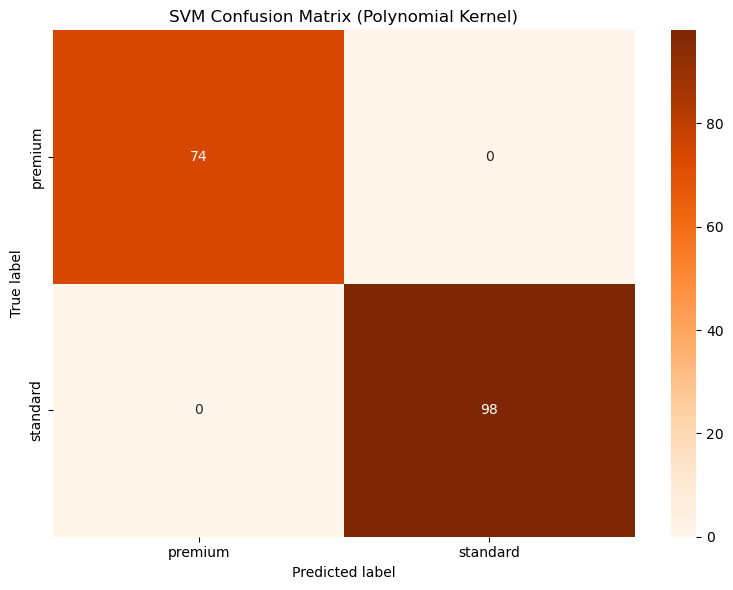

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title("SVM Confusion Matrix (Polynomial Kernel)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()
          